# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [297]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import log_loss
# data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
X = data.drop(columns=['Class'])
y = data['Class']

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
c = Counter(y_train)
print(f'отношение классов {c[0] / c[1]}')

отношение классов 559.0112359550562


Counter({0: 199008, 1: 356})

In [132]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

In [41]:
print('Линейная регрессия:')
print(log_loss(y_test, y_pred_proba))

Линейная регрессия
0.004861663045949433


In [49]:
y_pred_proba_const = np.zeros(len(X_test))
print('Константное предсказание:')
print(log_loss(y_test, const))

Константное предсказание:
0.054975522742740056


In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred_proba_knn = knn.predict(X_test)

In [53]:
print('KNN:')
print(log_loss(y_test, y_pred_proba_knn))

KNN:
0.05255013203350157


### Нормализация

In [98]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [99]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test);

/home/fedor/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/fedor/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [100]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [101]:
print('Линейная регрессия:')
print(log_loss(y_test, y_pred_proba))

Линейная регрессия:
0.0035431214618405356


In [87]:
knn.fit(X_train, y_train)
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_knn = knn.predict(X_test)

In [94]:
print('KNN:')
print(log_loss(y_test, y_pred_proba_knn))

KNN:
0.008782587386242045


In [111]:
print('Accuracy:')
print('Константа')
print(accuracy_score(y_test, y_pred_proba_const))
print('Линейная регрессия')
print(accuracy_score(y_test, y_pred))
print('KNN')
print(accuracy_score(y_test, y_pred_knn))

Accuracy:
Константа
0.9984082955888721
Линейная регрессия
0.9992626663389628
KNN
0.9994148145547324


In [115]:
print('PRECISION')
print('Константа')
print(precision_score(y_test, y_pred_proba_const))
print('Линейная регрессия')
print(precision_score(y_test, y_pred))
print('KNN')
print(precision_score(y_test, y_pred_knn))

PRECISION
Константа
0.0
Линейная регрессия
0.8762886597938144
KNN
0.8583333333333333


/home/fedor/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
print('RECALL')
print('Константа')
print(recall_score(y_test, y_pred_proba_const))
print('Линейная регрессия')
print(recall_score(y_test, y_pred))
print('KNN')
print(recall_score(y_test, y_pred_knn))

RECALL
Константа
0.0
Линейная регрессия
0.625
KNN
0.7573529411764706


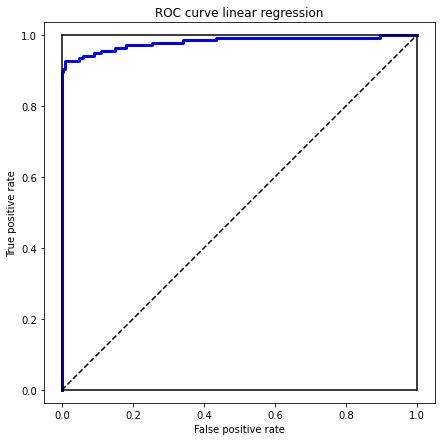

In [121]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve linear regression')
plt.show()

In [124]:
print(roc_auc_score(y_test, y_pred_proba))

0.9807352372296874


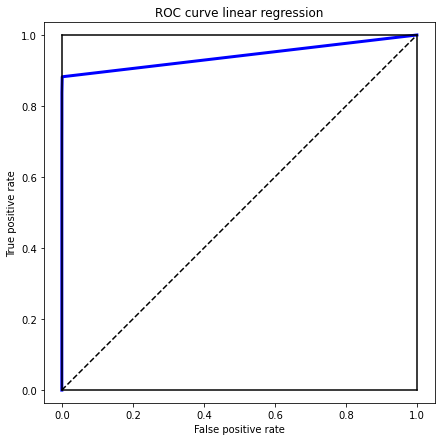

In [122]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve linear regression')
plt.show()

In [126]:
print(roc_auc_score(y_test, y_pred_proba_knn[:, 1]))

0.9410350264339385


In [197]:
log_reg = LogisticRegression(class_weight={0:1, 1:132}, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_pred_proba = log_reg.predict_proba(X_test)

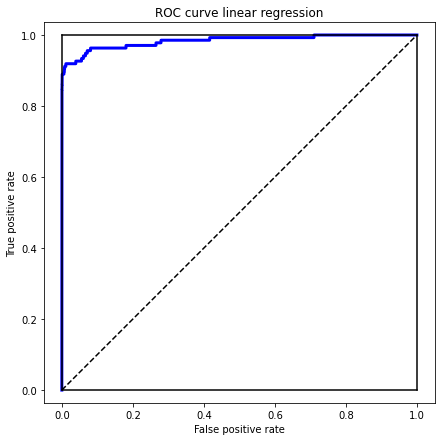

In [209]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_pred_proba[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve linear regression')
plt.show()

In [210]:
print(roc_auc_score(y_test, log_reg_pred_proba[:, 1]))

0.9832666652415945


In [234]:
print(accuracy_score(y_test, log_reg_pred))

0.9939257750781223


In [192]:
w = np.linspace(1, 700, 70)
y = []
for elem in tqdm(w):
    log_reg = LogisticRegression(class_weight={0:1, 1:elem}, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y.append(roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

100%|███████████████████████████████████████████| 70/70 [05:57<00:00,  5.11s/it]


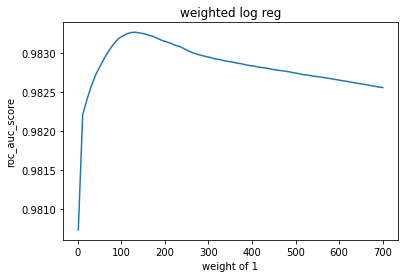

In [195]:
plt.plot(w, y);
plt.xlabel('weight of 1')
plt.ylabel('roc_auc_score')
plt.title('weighted log reg');

In [212]:
print('Лучший вес')
print(w[np.argmax(y)])
print('Лучший скор')
print(np.max(y))

Лучший вес
132.69565217391303
Лучший скор
0.9832611488333831


### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

### нам необходимо уменьшить false positive rate, чтобы обычные пользователи не получали бан. Иными словами: нам нужно иметь максимальную precision, потеряя как можно меньше recall. (Но  precision в приоритете, т.к. если забаним обычного пользователя он может уйти от банка). Выберем взвешенную линейную регрессию т.к. она имеет лучший roc_auc_score

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [231]:
from sklearn.metrics import f1_score

t = np.linspace(0, 1, 50)
y = log_reg_pred_proba[:, 1]

precision = []
recall = []
f1 = []
accuracy = []

for threshold in t:
    ans = y > threshold
    precision.append(precision_score(y_test, ans))
    recall.append(recall_score(y_test, ans))
    f1.append(f1_score(y_test, ans))
    accuracy.append(accuracy_score(y_test, ans))

/home/fedor/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


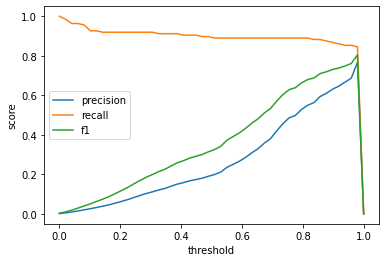

In [226]:
plt.plot(t, precision)
plt.plot(t, recall)
plt.plot(t, f1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend(['precision', 'recall', 'f1'])

In [233]:
ind = np.argmax(f1)
print(f'precision = {precision[ind]}')
print(f'recall = {recall[ind]}')
print(f'best threshold = {t[ind]}')
print(f'accuracy = {accuracy[ind]}')

precision = 0.7666666666666667
recall = 0.8455882352941176
best threshold = 0.9795918367346939
accuracy = 0.9993445923013002


# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [140]:
import seaborn as sns

In [141]:
!ls

 bodyPerformance.csv   inclass_classification.ipynb  'Task 4.ipynb'
 creditcard.csv        pulsar_stars.csv


In [142]:
data = pd.read_csv('bodyPerformance.csv')

In [143]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [144]:
print(len(data))

13393


In [145]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [146]:
print(data['gender'].value_counts())

M    8467
F    4926
Name: gender, dtype: int64


In [147]:
man_col = data['gender'] == 'M'
wom_col = data['gender'] == 'F'

In [148]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


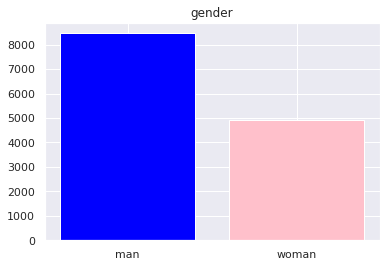

In [149]:
plt.bar(['man', 'woman'], [man_count, wom_count], color = ('blue', 'pink'))
plt.title('gender');

In [150]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<AxesSubplot:xlabel='class', ylabel='count'>

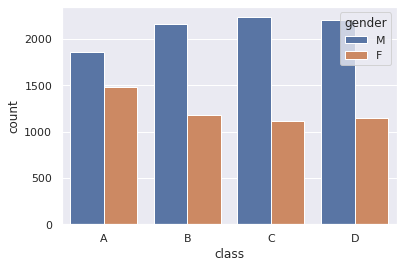

In [151]:
sns.set_theme(style="darkgrid")
sns.countplot(x='class', hue='gender', order=['A', 'B', 'C', 'D'], data=data)

In [152]:
one_hot_class = pd.get_dummies(data['class'])
one_hot.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [153]:
one_hot_gender = pd.get_dummies(data['gender'])
one_hot.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [154]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [191]:
x = data.drop(columns=['class'])
y = data['class']

In [158]:
X = pd.concat([one_hot_gender, data, one_hot_class], axis=1).drop(columns=['gender', 'class'])
X.head()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,A,B,C,D
0,0,1,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,0,1,0
1,0,1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,0,0
2,0,1,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,0,1,0
3,0,1,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,0
4,0,1,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,0


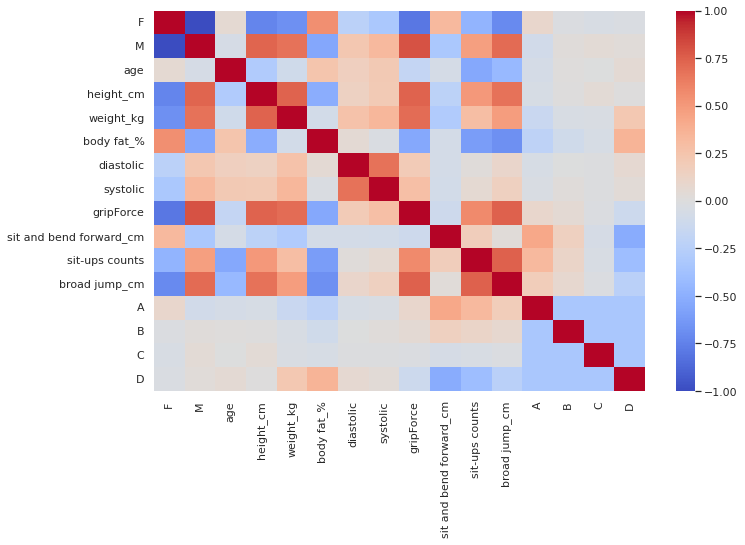

In [169]:
plt.figure(figsize=(11, 7))
sns.heatmap(X.corr(), cmap='coolwarm');

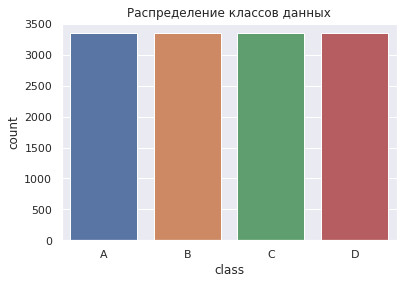

In [188]:
sns.countplot(x='class', data=data, order=['A', 'B', 'C', 'D'])
plt.title('Распределение классов данных');

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

## Обучение модели

In [207]:
X_data = X.drop(columns=['A', 'B', 'C', 'D'])
X_data.head()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0,1,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,0,1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,0,1,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,0,1,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,0,1,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [221]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [222]:
y_pred = log_reg.predict(X_test)

In [225]:
print("regression accuracy:")
print(accuracy_score(y_test, y_pred))

regression accuracy:
0.6196341918626354


In [226]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [227]:
print('KNN accuracy')
print(accuracy_score(y_test, y_pred_knn))

KNN accuracy
0.5655095184770437


## Нормализация

In [234]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)


log_reg.fit(X_train, y_train)

In [237]:
log_reg.fit(X_train_std, y_train)

LogisticRegression(max_iter=10000)

In [238]:
y_pred = log_reg.predict(X_test_std)
print("regression accuracy:")
print(accuracy_score(y_test, y_pred))

regression accuracy:
0.6207540126913027


In [239]:
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)

In [240]:
print('KNN accuracy')
print(accuracy_score(y_test, y_pred_knn))

KNN accuracy
0.6061963419186264


In [276]:
grid = {"C" : np.linspace(0, 2, 10), "penalty" : ["l1", "l2"]}
logreg_cv = GridSearchCV(log_reg, grid, scoring="accuracy")
logreg_cv.fit(X_train_std, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [278]:
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

0.6145234762126969
{'C': 0.2222222222222222, 'penalty': 'l2'}


In [267]:
grid = {"n_neighbors" : np.linspace(15, 30, 15, dtype=int), "weights" : ['uniform', 'distance']}
knn_cv = GridSearchCV(knn, grid, scoring='accuracy')
knn_cv.fit(X_train_std, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [268]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.6264691722076916
{'n_neighbors': 25, 'weights': 'distance'}


In [275]:
knn = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)

In [280]:
log_reg = LogisticRegression(C = 0.22, penalty='l2')
log_reg.fit(X_train_std, y_train)
y_pred_log_reg = log_reg.predict(X_test_std)

## Скоры моделей

In [283]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))

0.6196341918626354
0.6312056737588653


In [284]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))

0.6189677857688459
0.6517613932115671


In [285]:
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(precision_score(y_test, y_pred_knn, average='micro'))

0.6196341918626354
0.6312056737588653


In [286]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))

0.6173742566475557
0.6291267701416291


In [287]:
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))

0.6196341918626354
0.6312056737588653


In [290]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.6180874875333604
0.6325489171551821


In [291]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.6180874875333604
0.6325489171551821


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

## Допустим мы хотим как можно точно точнее определять людей A класса, но если мы ошибемся то ничего, главное никаких людей A класса не пропустить. Тогда нам нужно максимизировать recall (полноту) людей A класса. Будем использовать взвешенную линейную регрессию

In [353]:
def precisionA(y_pred, y_test):
    TP = np.sum((y_pred == 'A') & (y_test == 'A'))
    FP = np.sum((y_pred == 'A') & (y_test != 'A'))
    return TP / (TP + FP)

def recallA(y_pred, y_test):
    TP = np.sum((y_pred == 'A') & (y_test == 'A'))
    FP = np.sum((y_pred == 'A') & (y_test != 'A'))
    FN = np.sum((y_pred != 'A') & (y_test == 'A'))
    return TP / (TP + FN)
def f1score(prec, rec):
    return 2 * prec * rec / (prec + rec)

In [354]:
ws = np.linspace(1, 10, 20)
acc = []
precA = []
recA = []
f1 = []
for w in tqdm(ws):
    log_reg = LogisticRegression(class_weight={'A' : w, 'B' : 1, 'C' : 1, 'D' : 1},
                                 C=0.22, penalty='l2', max_iter=10000)
    log_reg.fit(X_train_std, y_train)
    y_pred = log_reg.predict(X_test_std)
    acc.append(accuracy_score(y_pred, y_test))
    precA.append(precisionA(y_pred, y_test))
    recA.append(recallA(y_pred, y_test))
    f1.append(f1score(precisionA(y_pred, y_test), recallA(y_pred, y_test)))

100%|███████████████████████████████████████████| 20/20 [00:06<00:00,  3.23it/s]


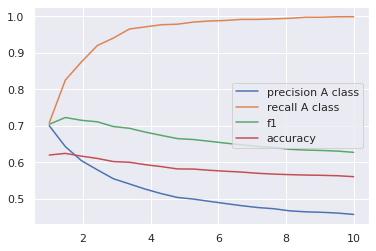

In [359]:
plt.plot(ws, precA)
plt.plot(ws, recA)
plt.plot(ws, f1)
plt.plot(ws, acc)
plt.legend(['precision A class', 'recall A class', 'f1', 'accuracy']);

In [366]:
ind = 3
w = ws[ind]
print('optimal weight:')
print(w)
print('precision on A class')
print(precA[ind])
print('recall on A class')
print(recA[ind])
print('f1 on A class')
print(f1[ind])
print('accuracy all dataset')
print(acc[ind])

optimal weight:
2.4210526315789473
precision on A class
0.5790441176470589
recall on A class
0.9197080291970803
f1 on A class
0.7106598984771574
accuracy all dataset
0.6103023516237402
